# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units='imperial'

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
cities_2=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

index=0
group=1
count=1
success=0
fail=0

print('Beginning Data Retrieval\n-----------------------------')
while index< len(cities):
    for city in cities[index:index+50]:
        query_url=f"{url}appid={weather_api_key}&units={units}&q="
        weather_response = requests.get(query_url+city).json()

        try:
            cities_2.append(weather_response['name'])
            lat.append(weather_response['coord']['lat'])
            lng.append(weather_response['coord']['lon'])
            max_temp.append(weather_response['main']['temp_max'])
            humidity.append(weather_response['main']['humidity'])
            wind_speed.append(weather_response['wind']['speed'])
            cloudiness.append(weather_response['clouds']['all'])
            date.append(weather_response['dt'])
            country.append(weather_response['sys']['country'])
            print(f'Processing Record {count} of Set {group} | {city}')
            
            success+=1
            count+=1
            index+=1
        except KeyError:
            print('City not found. Skipping...')
            count+=1
            index+=1
            fail+=1

    group+=1
    count=1
    time.sleep(60)
print('''-----------------------------
Data Retrieval Complete
-----------------------------''')
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | mpulungu
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | kayiry
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | bijie
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | qandala
Processing Record 14 of Set 1 | hobyo
Processing Record 15 of Set 1 | tuatapere
City not found. Skipping...
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | hualmay
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | tiarei
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set 1 | ust-kuyga
Processing Record 24 of Set 1 | leb

Processing Record 6 of Set 5 | honningsvag
City not found. Skipping...
Processing Record 8 of Set 5 | tual
Processing Record 9 of Set 5 | ljungby
City not found. Skipping...
Processing Record 11 of Set 5 | alofi
Processing Record 12 of Set 5 | hithadhoo
Processing Record 13 of Set 5 | kabare
Processing Record 14 of Set 5 | mangrol
Processing Record 15 of Set 5 | okhotsk
Processing Record 16 of Set 5 | coalinga
Processing Record 17 of Set 5 | nikolayevskaya
City not found. Skipping...
Processing Record 19 of Set 5 | muyezerskiy
Processing Record 20 of Set 5 | anloga
Processing Record 21 of Set 5 | pampa
Processing Record 22 of Set 5 | puerto madero
Processing Record 23 of Set 5 | coihueco
Processing Record 24 of Set 5 | sibolga
Processing Record 25 of Set 5 | tommot
Processing Record 26 of Set 5 | paranaiba
City not found. Skipping...
Processing Record 28 of Set 5 | coquimbo
Processing Record 29 of Set 5 | phibun mangsahan
Processing Record 30 of Set 5 | katsuura
Processing Record 31 of

Processing Record 11 of Set 9 | zyryanka
City not found. Skipping...
Processing Record 13 of Set 9 | yar-sale
Processing Record 14 of Set 9 | teahupoo
Processing Record 15 of Set 9 | haines junction
Processing Record 16 of Set 9 | chirongui
Processing Record 17 of Set 9 | timmins
Processing Record 18 of Set 9 | kruglolesskoye
Processing Record 19 of Set 9 | lethbridge
Processing Record 20 of Set 9 | codrington
Processing Record 21 of Set 9 | isabela
Processing Record 22 of Set 9 | anqing
City not found. Skipping...
Processing Record 24 of Set 9 | el tigre
Processing Record 25 of Set 9 | moron
City not found. Skipping...
Processing Record 27 of Set 9 | puerto del rosario
Processing Record 28 of Set 9 | bubaque
Processing Record 29 of Set 9 | lardos
Processing Record 30 of Set 9 | voiron
Processing Record 31 of Set 9 | elizabeth city
City not found. Skipping...
Processing Record 33 of Set 9 | sambava
Processing Record 34 of Set 9 | ouadda
Processing Record 35 of Set 9 | seddon
Processing

City not found. Skipping...
Processing Record 13 of Set 13 | alagoinhas
City not found. Skipping...
Processing Record 15 of Set 13 | san patricio
Processing Record 16 of Set 13 | chifeng
City not found. Skipping...
Processing Record 18 of Set 13 | temiscaming
City not found. Skipping...
Processing Record 20 of Set 13 | bissau
Processing Record 21 of Set 13 | banda aceh
Processing Record 22 of Set 13 | waipawa
Processing Record 23 of Set 13 | belyy yar
Processing Record 24 of Set 13 | miri
Processing Record 25 of Set 13 | shenjiamen
Processing Record 26 of Set 13 | mason city
City not found. Skipping...
Processing Record 28 of Set 13 | akyab
Processing Record 29 of Set 13 | mokhsogollokh
Processing Record 30 of Set 13 | pleasant grove
Processing Record 31 of Set 13 | ugoofaaru
Processing Record 32 of Set 13 | segezha
-----------------------------
Data Retrieval Complete
-----------------------------


In [6]:
print(f'success: {success}  fail: {fail}')
success + fail

success: 574  fail: 58


632

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
data={
    'City': cities_2,# this will equal 606 but  I only have 553 of the others
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date

}
weather_df=pd.DataFrame(data)
weather_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [8]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,32.00,95,90,23.04,AR,1595810577
1,Saskylakh,71.92,114.08,38.73,94,100,18.34,RU,1595810577
2,Jamestown,42.10,-79.24,77.00,65,1,5.82,US,1595810404
3,Lüderitz,-26.65,15.16,60.80,63,0,12.75,NA,1595810531
4,Mpulungu,-8.76,31.11,65.32,67,56,7.83,ZM,1595810578


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [32]:
check_for_humidity_errors=weather_df.loc[weather_df['Humidity']>100]
check_for_humidity_errors # No humidity error detected

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [33]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,32.00,95,90,23.04,AR,1595810577
1,Saskylakh,71.92,114.08,38.73,94,100,18.34,RU,1595810577
2,Jamestown,42.10,-79.24,77.00,65,1,5.82,US,1595810404
3,Lüderitz,-26.65,15.16,60.80,63,0,12.75,NA,1595810531
4,Mpulungu,-8.76,31.11,65.32,67,56,7.83,ZM,1595810578


In [35]:
#  Get the indices of cities that have humidity over 100%.
# N/A But, if I were to have humidity over 100% I would do the following because the return for check_for... 
# keeps original index values
check_for_humidity_errors.index

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# There are none humidity outliers based on "over 100%"

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [54]:
# Extract relevant fields from the data frame
latitudes=weather_df['Lat']
temperatures=weather_df['Max Temp']
humidity=weather_df['Humidity']
cloudiness=weather_df['Cloudiness']
wind_speed=weather_df['Wind Speed']

# Export the City_Data into a csv
# I could have kept the column order with: columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 
# 'Cloudiness', 'Wind Speed', 'Country', 'Date']
weather_df.to_csv('weather_data.csv', index_label='City_ID')
latitudes

0     -54.80
1      71.92
2      42.10
3     -26.65
4      -8.76
       ...  
569    20.15
570    61.47
571    40.36
572     5.67
573    63.74
Name: Lat, Length: 574, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

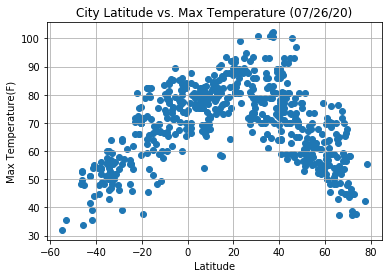

In [53]:
plt.scatter(latitudes, temperatures, marker='o')

plt.title("City Latitude vs. Max Temperature (07/26/20)")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Humidity Plot

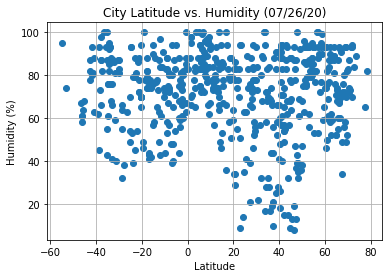

In [60]:
plt.scatter(latitudes, humidity, marker='o')

plt.title("City Latitude vs. Humidity (07/26/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

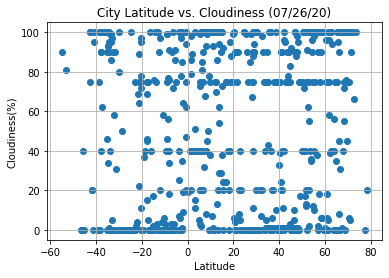

In [61]:
plt.scatter(latitudes, cloudiness, marker='o')

plt.title("City Latitude vs. Cloudiness (07/26/20)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

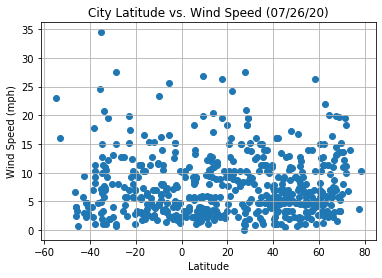

In [62]:
plt.scatter(latitudes, wind_speed, marker='o')

plt.title("City Latitude vs. Wind Speed (07/26/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [69]:
# Create Northern and Southern Hemisphere DataFrames
norther_weather_df=weather_df.loc[weather_df['Lat']>=0]
n_latitudes=norther_weather_df['Lat']
n_temperatures=norther_weather_df['Max Temp']
n_humidity=norther_weather_df['Humidity']
n_cloudiness=norther_weather_df['Cloudiness']
n_wind_speed=norther_weather_df['Wind Speed']

s_souther_weather_df=weather_df.loc[weather_df['Lat']<0]
s_latitudes=souther_weather_df['Lat']
s_temperatures=souther_weather_df['Max Temp']
s_humidity=souther_weather_df['Humidity']
s_cloudiness=souther_weather_df['Cloudiness']
s_wind_speed=souther_weather_df['Wind Speed']

# norther_weather_df.head()
# souther_weather_df.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39853461227413206


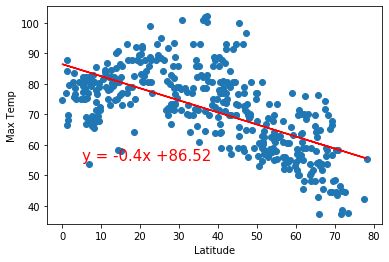

In [77]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitudes, n_temperatures)
# Get regression values
regress_values = n_latitudes * slope + intercept
#print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
# Create Plot
plt.scatter(n_latitudes,n_temperatures)
plt.plot(n_latitudes,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(5,55),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6164374867755709


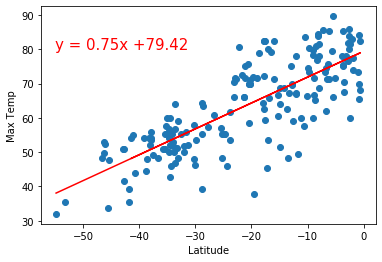

In [81]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitudes, s_temperatures)
# Get regression values
regress_values = s_latitudes * slope + intercept
#print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
# Create Plot
plt.scatter(s_latitudes,s_temperatures)
plt.plot(s_latitudes,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005101250319421484


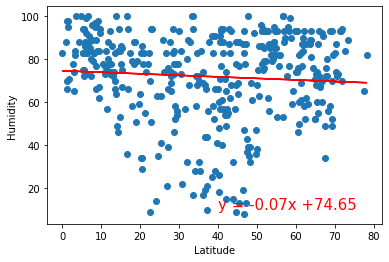

In [84]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitudes, n_humidity)
# Get regression values
regress_values = n_latitudes * slope + intercept
#print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
# Create Plot
plt.scatter(n_latitudes,n_humidity)
plt.plot(n_latitudes,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.011247293701897176


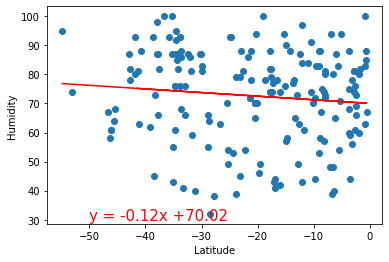

In [87]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitudes, s_humidity)
# Get regression values
regress_values = s_latitudes * slope + intercept
#print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
# Create Plot
plt.scatter(s_latitudes,s_humidity)
plt.plot(s_latitudes,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 5.141917152320586e-05


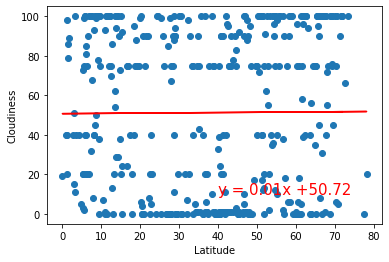

In [89]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitudes, n_cloudiness)
# Get regression values
regress_values = n_latitudes * slope + intercept
#print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
# Create Plot
plt.scatter(n_latitudes,n_cloudiness)
plt.plot(n_latitudes,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004711595956631444


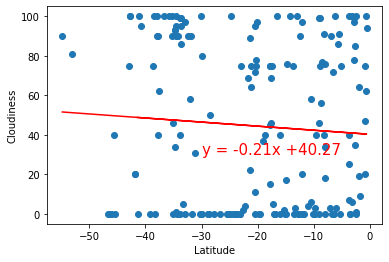

In [92]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitudes, s_cloudiness)
# Get regression values
regress_values = s_latitudes * slope + intercept
#print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
# Create Plot
plt.scatter(s_latitudes,s_cloudiness)
plt.plot(s_latitudes,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003099368327365178


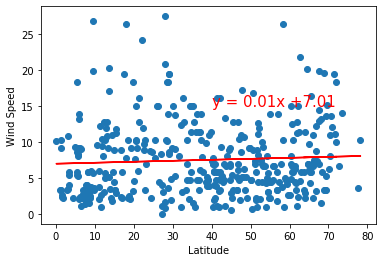

In [95]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_latitudes, n_wind_speed)
# Get regression values
regress_values = n_latitudes * slope + intercept
#print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
# Create Plot
plt.scatter(n_latitudes, n_wind_speed)
plt.plot(n_latitudes,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01257501925010261


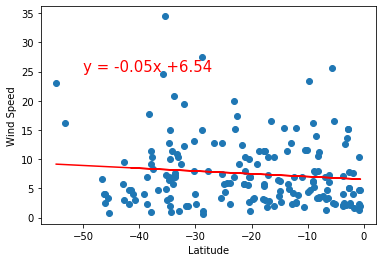

In [99]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_latitudes, s_wind_speed)
# Get regression values
regress_values = s_latitudes * slope + intercept
#print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)
# Create Plot
plt.scatter(s_latitudes, s_wind_speed)
plt.plot(s_latitudes,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()